<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data_description = open('/Users/wg/Desktop/DSI-SF-4/datasets/housing_regression/data_description.txt').read()
print data_description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
house = pd.read_csv('/Users/wg/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house[['SalePrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


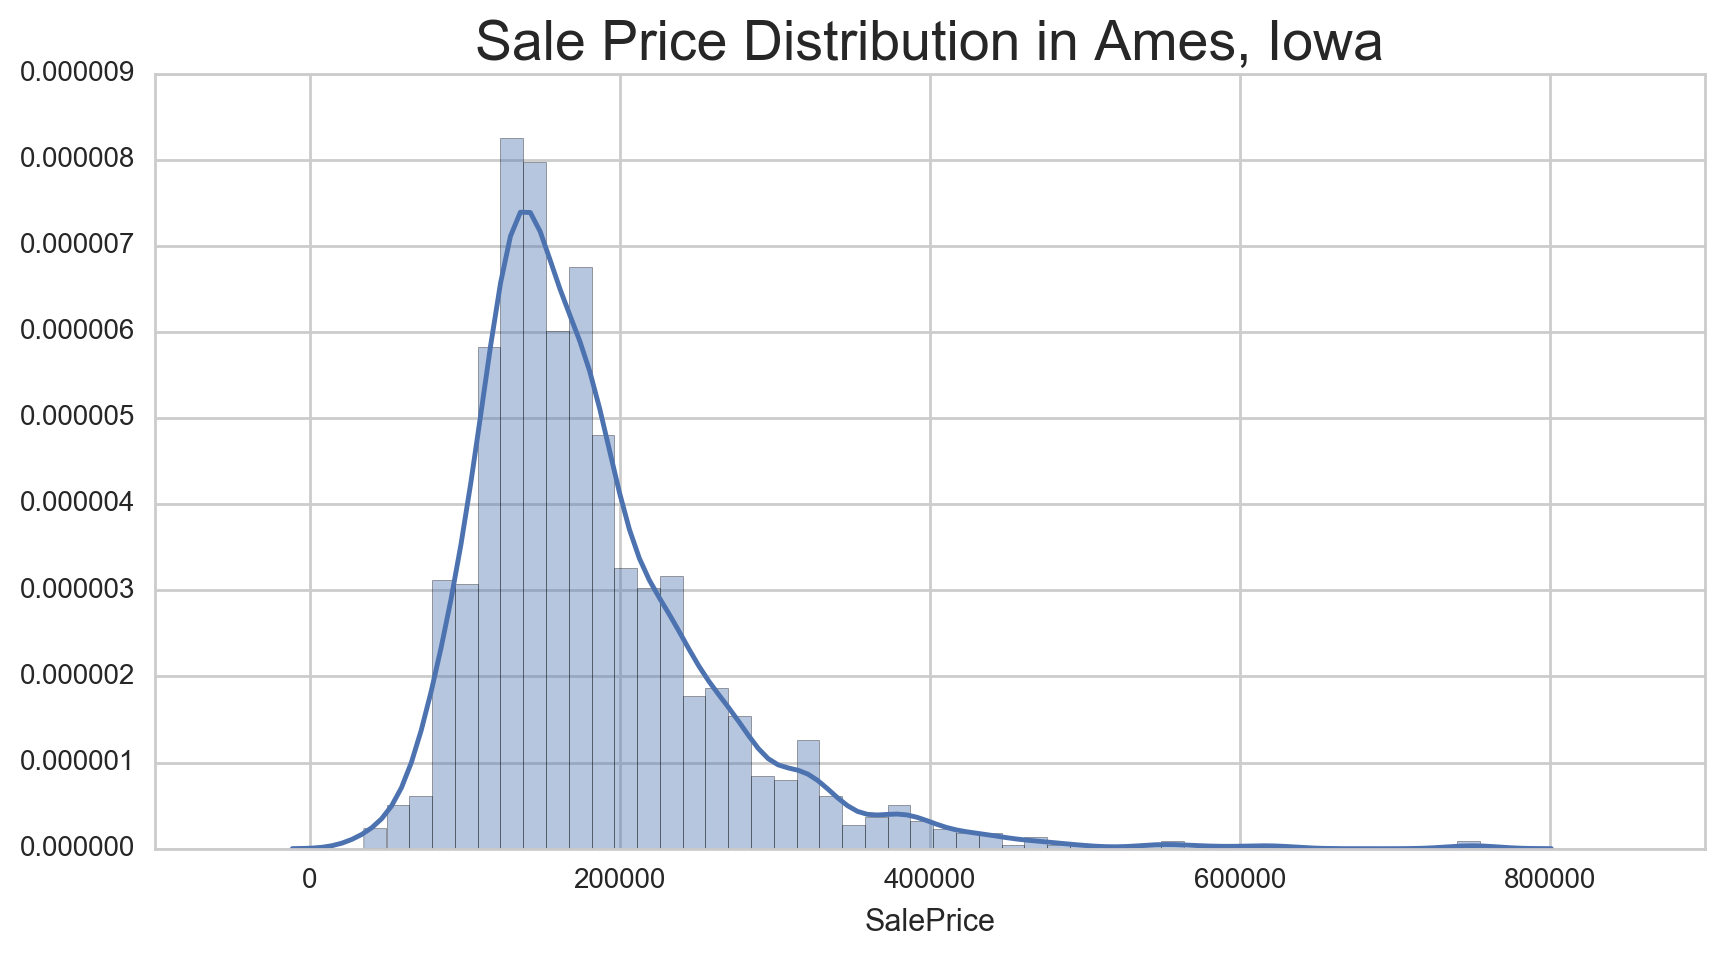

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
sns.distplot(house['SalePrice'])
plt.title('Sale Price Distribution in Ames, Iowa', fontsize=20)

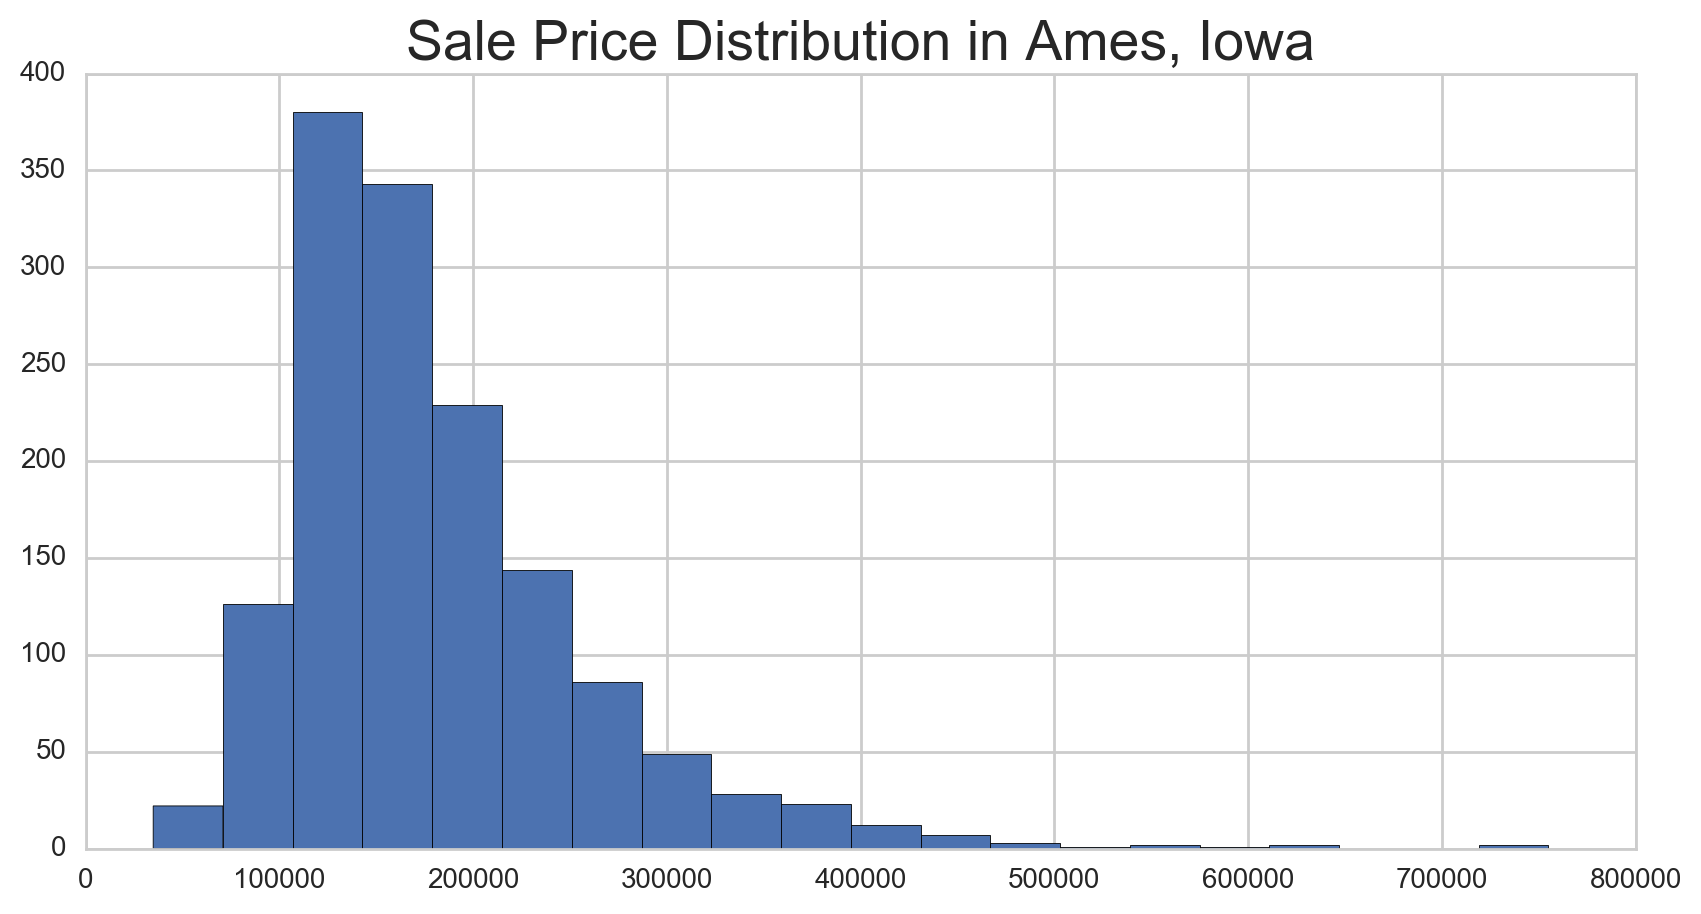

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
plt.hist(house['SalePrice'], bins = 20 )
plt.title('Sale Price Distribution in Ames, Iowa', fontsize=20)

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

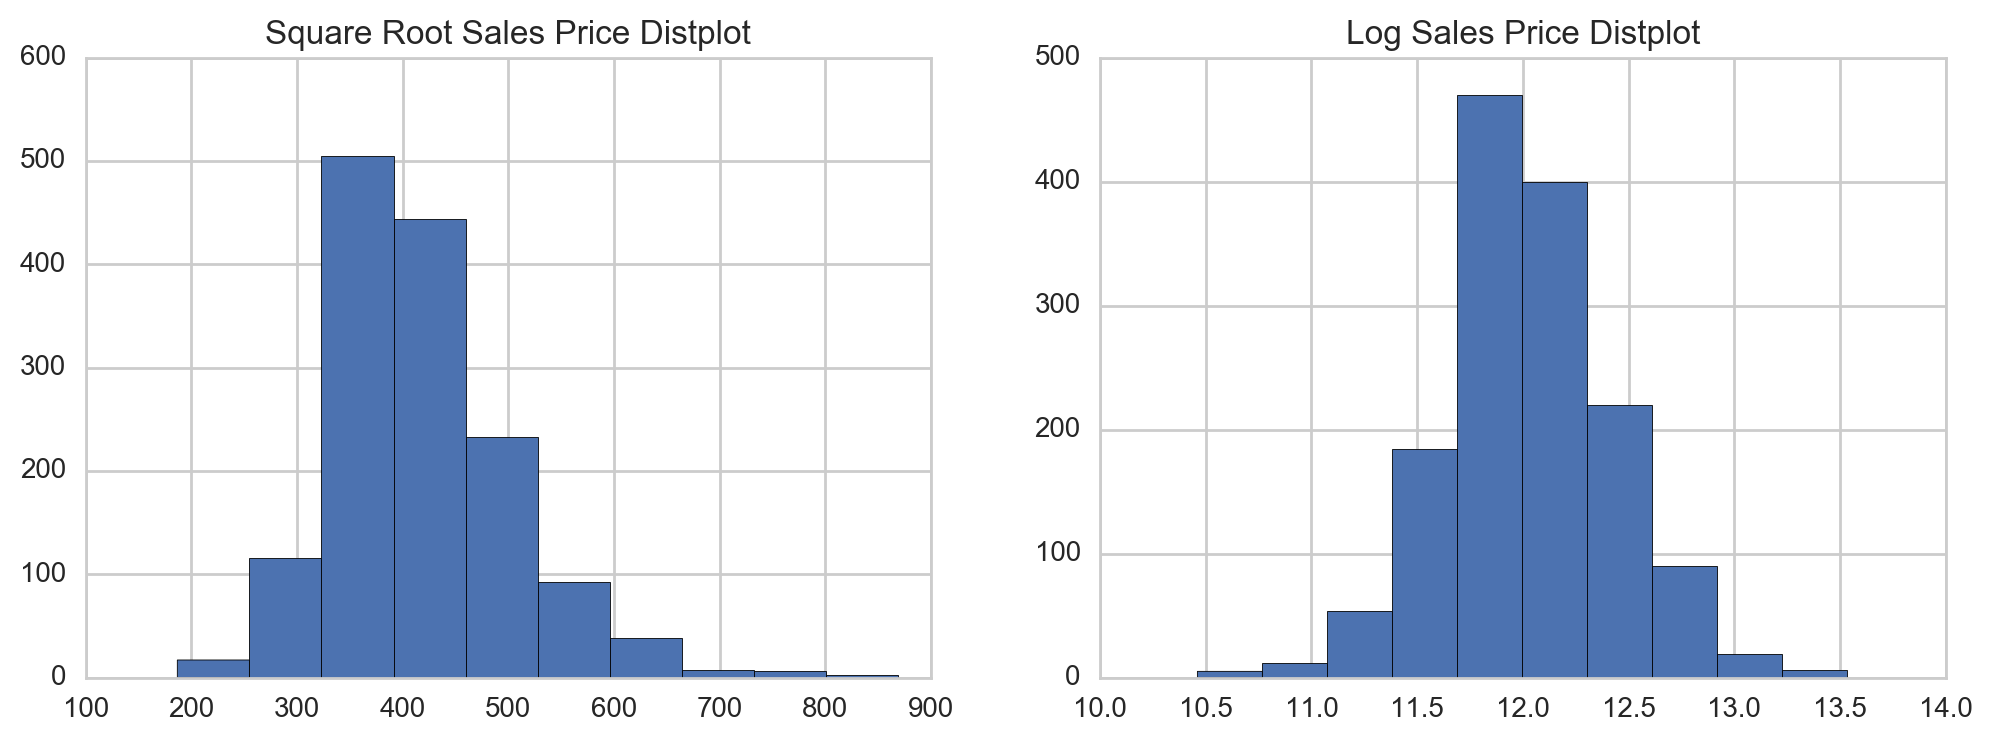

In [8]:
SalesPrice_sqrt=np.sqrt(house.SalePrice)
SalesPrice_log=np.log(house.SalePrice)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.hist(SalesPrice_sqrt)
ax1.set_title('Square Root Sales Price Distplot')
ax2.hist(SalesPrice_log)
ax2.set_title('Log Sales Price Distplot')

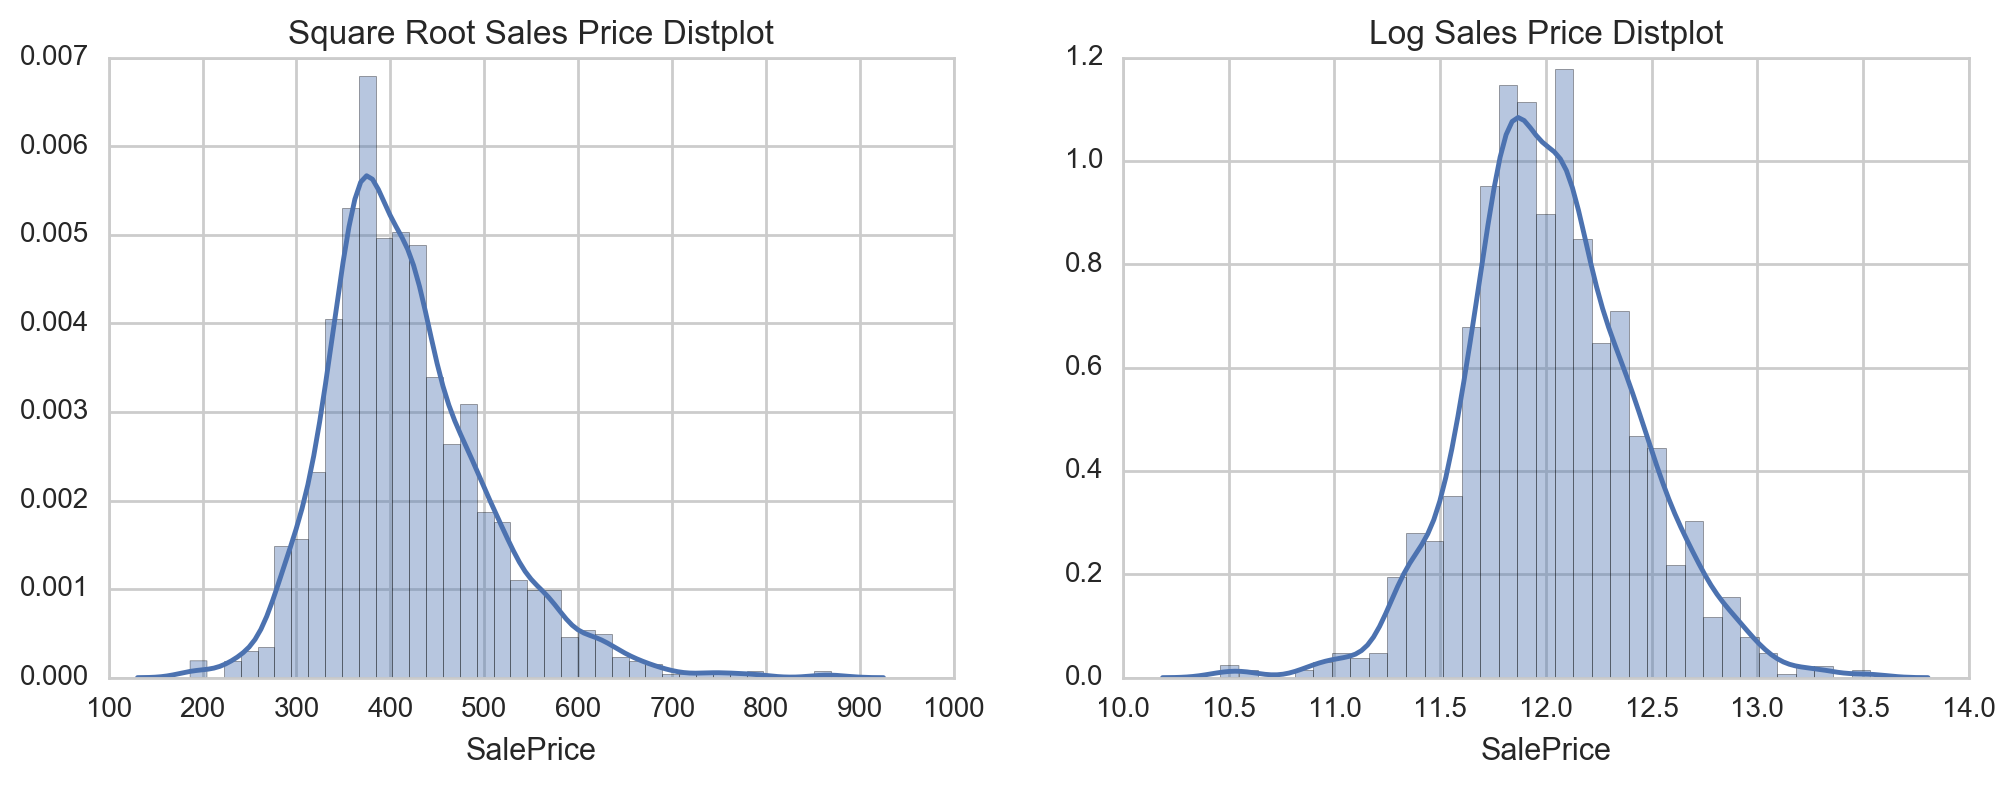

In [9]:
SalesPrice_sqrt=np.sqrt(house.SalePrice)
SalesPrice_log=np.log(house.SalePrice)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 4))
sns.distplot(SalesPrice_sqrt, ax=ax1)
ax1.set_title('Square Root Sales Price Distplot')
sns.distplot(SalesPrice_log, ax=ax2)
ax2.set_title('Log Sales Price Distplot')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


 - higher negative correlation when using log of sale price, followed by sqrt of sale price and sale price alone.

In [10]:
house['Age'] =  house['YrSold']- house['YearBuilt']
house.Age.describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64

In [11]:
house['SalesPrice_sqrt'] = SalesPrice_sqrt
house['SalesPrice_log'] = SalesPrice_log

In [12]:
print 'Correlation between age of a house when sold with the sale price:', house[['Age', 'SalePrice']].corr().iloc[0, 1]
print '\nCorrelation between age of a house when sold with sqrt of sale price:', house[['Age', 'SalesPrice_sqrt']].corr().iloc[0, 1]
print '\nCorrelation between age of a house when sold with log of sale price:', house[['Age', 'SalesPrice_log']].corr().iloc[0, 1]

Correlation between age of a house when sold with the sale price: -0.523350417547

Correlation between age of a house when sold with sqrt of sale price: -0.564853444443

Correlation between age of a house when sold with log of sale price: -0.587290047029


### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

- The shape of the charts are the same. Log sale price is tighter than the other two. 
- There is a negative correlation between age of the house at sale against the sale price variables.

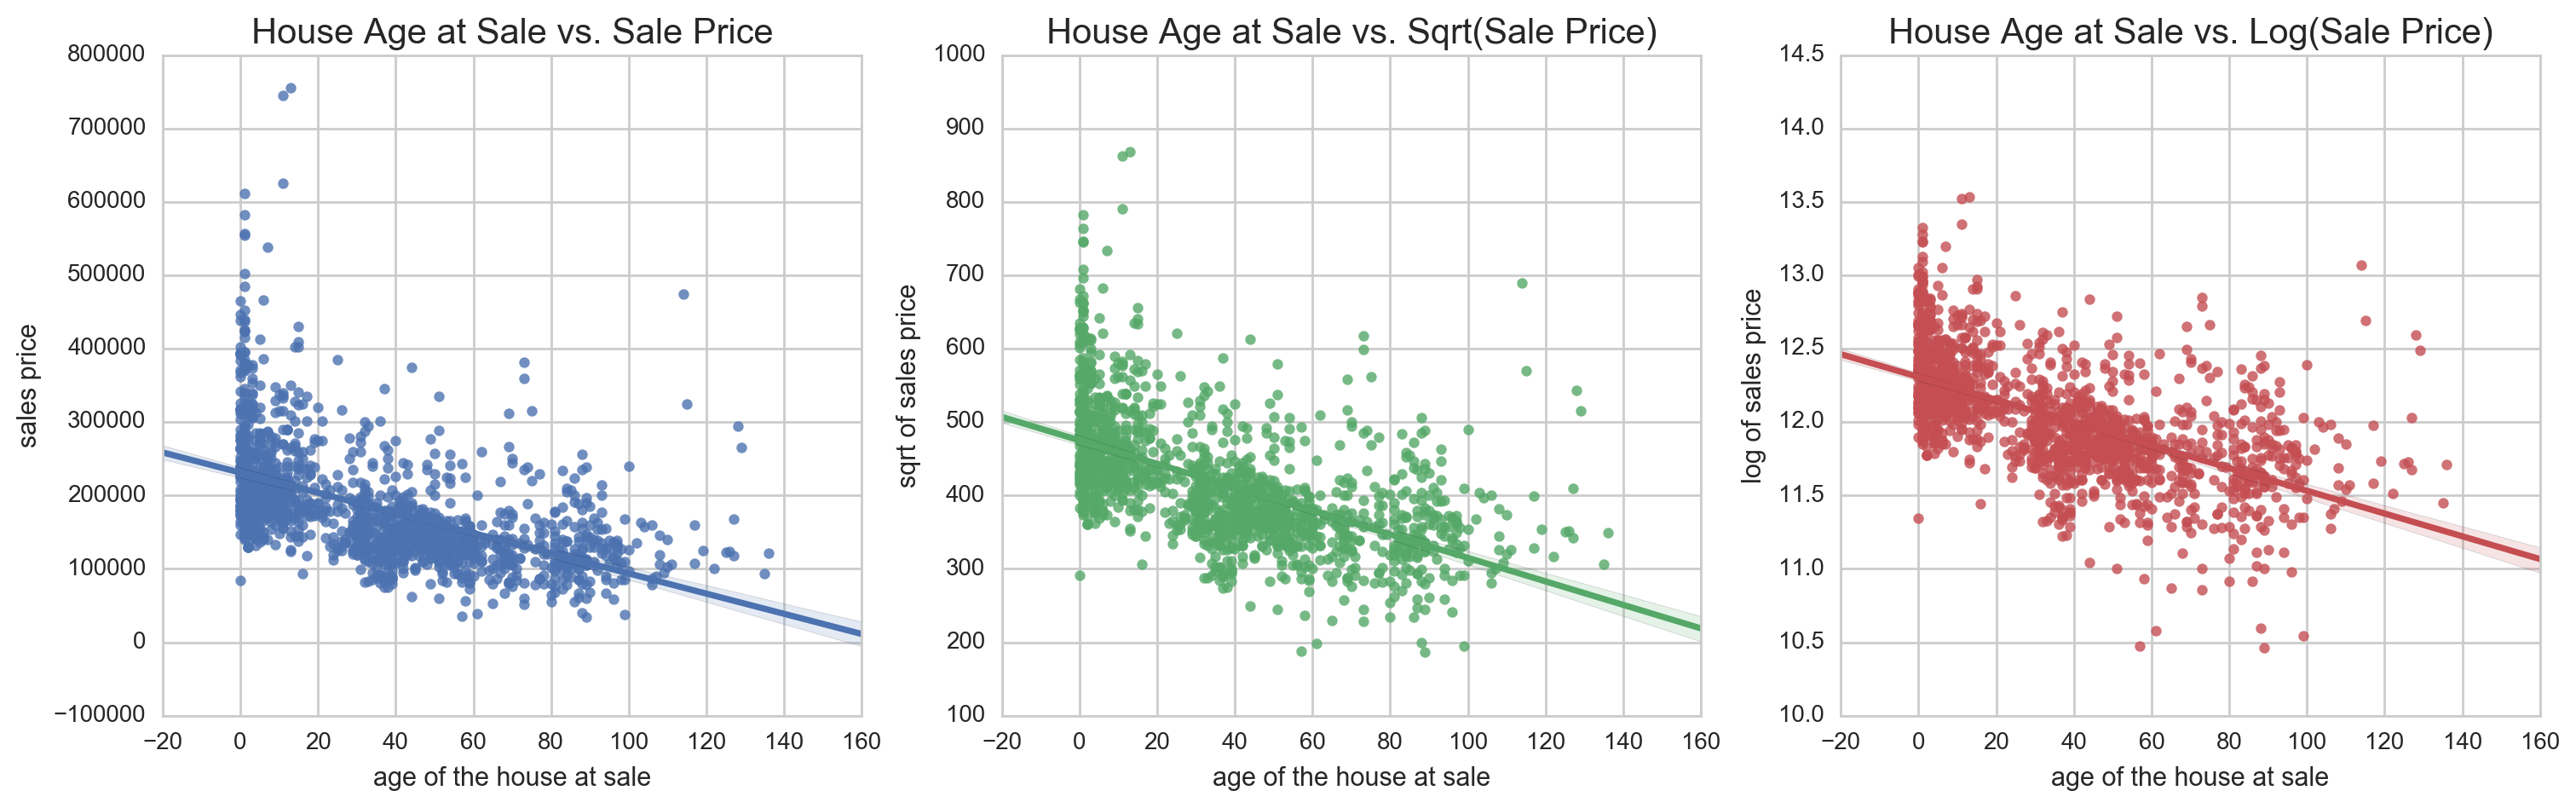

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18, 5))
sns.regplot(x = house['Age'], y = house['SalePrice'], ax=ax1 )
ax1.set_xlabel('age of the house at sale')
ax1.set_ylabel('sales price')
ax1.set_title('House Age at Sale vs. Sale Price', fontsize=15)

sns.regplot(x = house['Age'], y = house['SalesPrice_sqrt'], ax=ax2 )
ax2.set_xlabel('age of the house at sale')
ax2.set_ylabel('sqrt of sales price')
ax2.set_title('House Age at Sale vs. Sqrt(Sale Price)', fontsize=15)

sns.regplot(x = house['Age'], y = house['SalesPrice_log'], ax=ax3 )
ax3.set_xlabel('age of the house at sale')
ax3.set_ylim(10, 14.5)
ax3.set_ylabel('log of sales price')
ax3.set_title('House Age at Sale vs. Log(Sale Price)', fontsize=15)

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

- There is a positive correlation between the sale price and the total livable sqft, which makes intuitive sense.

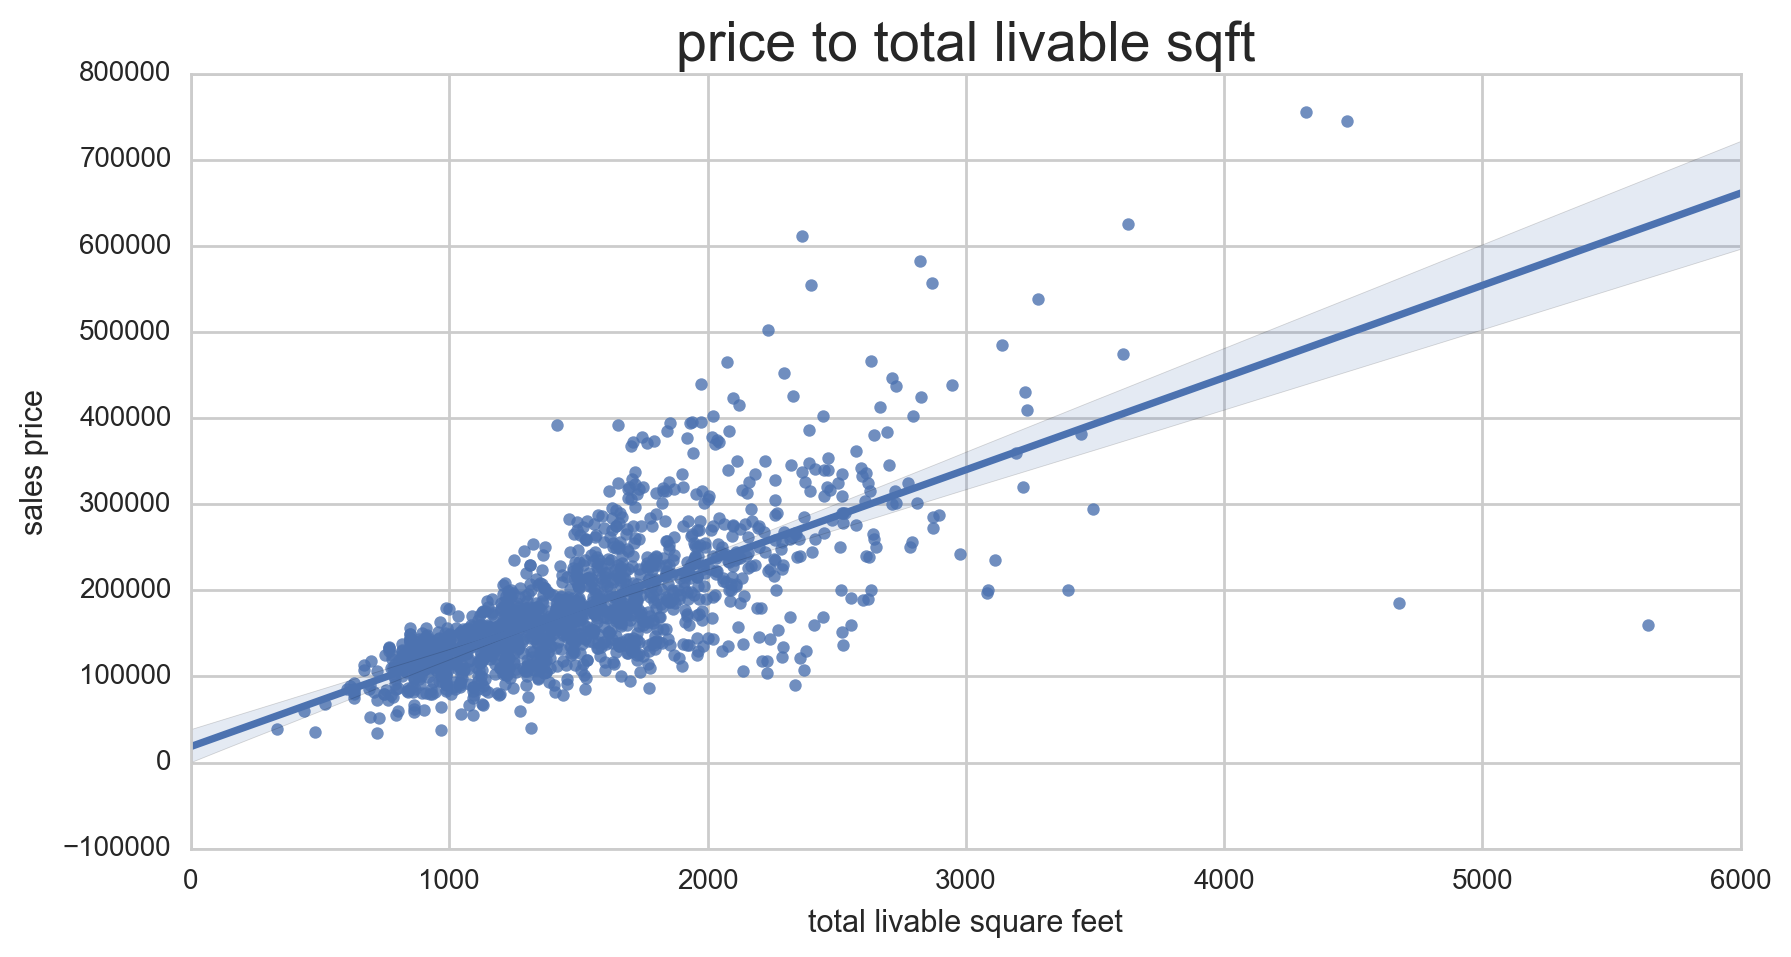

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.regplot(x = house.GrLivArea, y = house.SalePrice)
ax.set_xlabel('total livable square feet')
ax.set_ylabel('sales price')
ax.set_title('price to total livable sqft', fontsize = 20)

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart shows, if any?

### Answer
The countinuous variables in the dataset is limited:
   - Out of the 81 columns only 41 are int and float types.
   - Out of the 41 columns that have numerical features, majority are discrete. Continuous variables include those that are related to LotArea, Basement Area (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF), Livable Area (1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea), GarageArea, Deck and Porch related areas, Pool Area and Sale Price variables.
   - We have already explored the relationship between Sale Price and Livable Area. So out of my limited options, I have chosen LotArea and Sale Price as my variables. 
   - Similar to the relationship between Livable Area and Sale Price, not surprisingly there is a slight positive correlation between Lot Size and Sale Price. One would think bigger lot size indicate a combination of larger livable area, as well as larger yard. However what is more interesting is that there is a obvious cluster of data here, indicating lot size does not matter as much as livable area when it comes to sale price. Similar lot sizes could have a wide range of sale prices.

In [15]:
house.describe().T

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,NaN,NaN,NaN,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,NaN,NaN,NaN,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


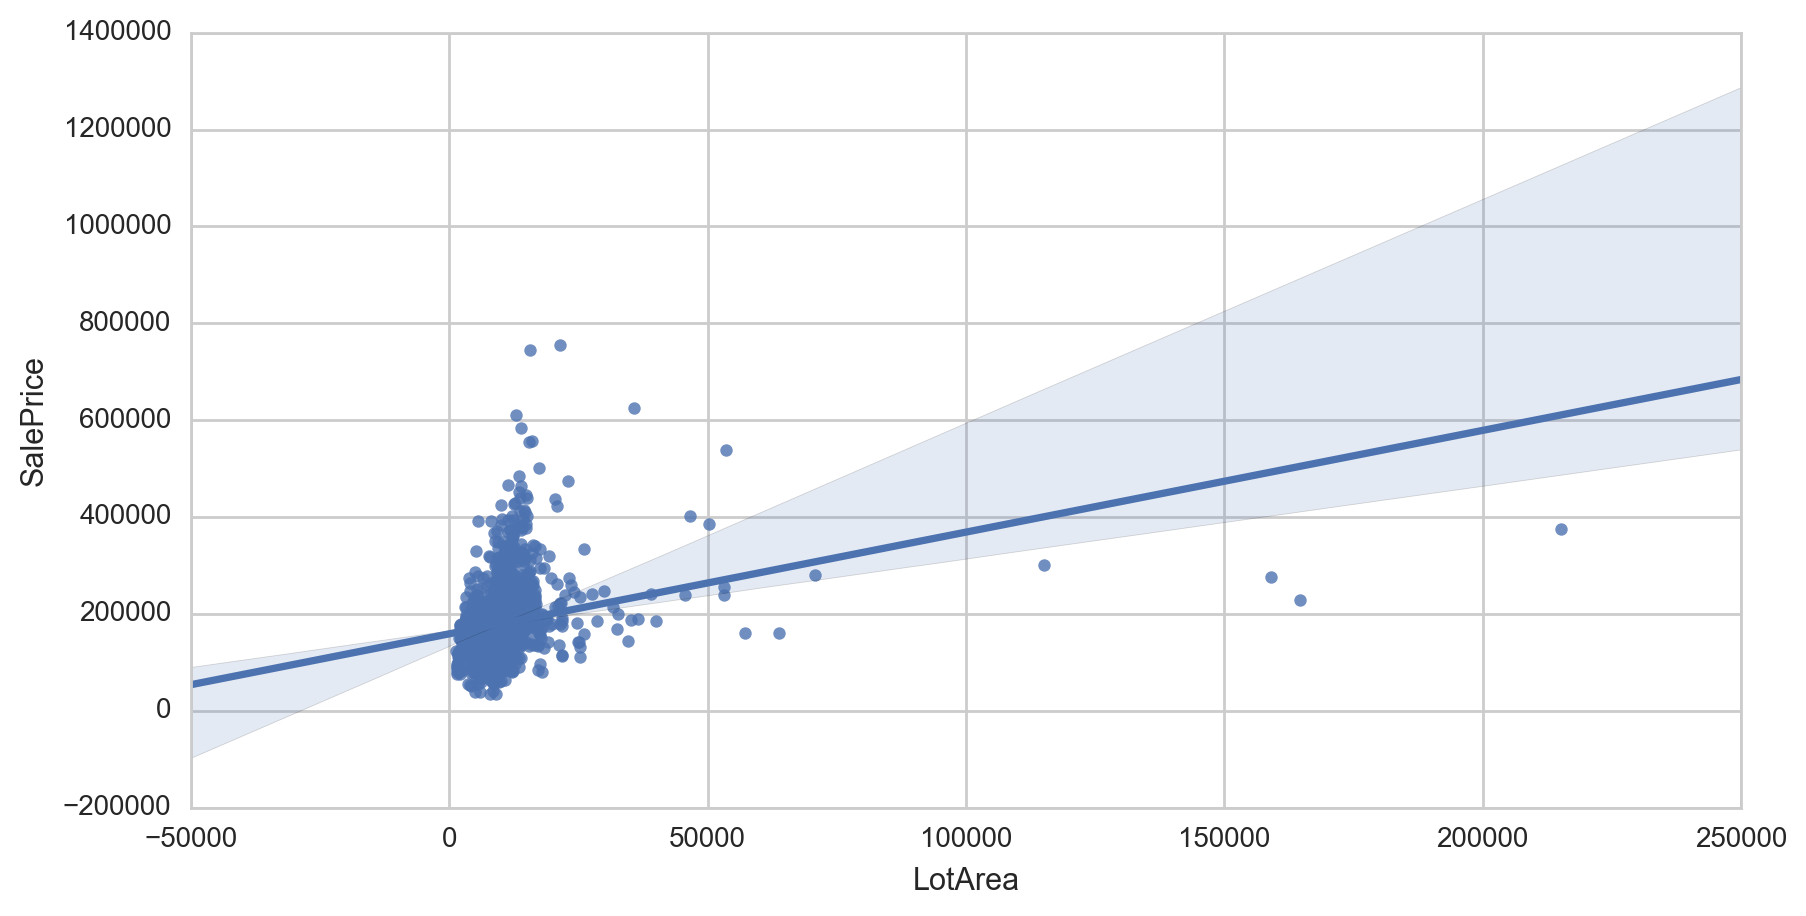

In [16]:
fig = plt.subplots(1,1,figsize=(10, 5))
sns.regplot(x = house.LotArea, y = house.SalePrice)
ax.set_title('Lot Area and Sale Price')


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [17]:
house.groupby('MSZoning')[['Id']].count().reset_index()

,MSZoning,Id
0,C (all),10
1,FV,65
2,RH,16
3,RL,1151
4,RM,218


MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [18]:
res_house = house[house['MSZoning'] != 'C (all)']
res_house.shape

(1450, 84)

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

### Answer

Below is a table that outlines the 19 columns that contain null values in the residential Ames housing data and the number of null values in each.
- Drop the observation if null values account for less than 1% of the data.
     - MasVnrArea
     - MasVnrType
     - Electrical
- Drop the variable if a significant portion (more than 80%) of the data is null.
     - Alley - Data description identifies NA as No Alley Access. 94% of the data has no alley access.
     - PoolQC - NA as in no Pool. 99.5% of the data has no pool.
     - Fence - NA as in no Fence. 81% of the data has no fence.
     - MiscFeature - 3.6% of the data has information under this category, which is not siginicant enough to warrant extensive analysis.
- Replace the null values for the rest of the data, mostly because null values represent a category.
     - LotFrontage - Linear feet of street connected to property with min value of 21, not 0. Replace nan with 0, which accounts about 20% of data. I make the assumption here that missing data means steet is directly connected to property.
     - FireplaceQu - type object. NA as in no Fireplace which accounts for a little less than half of the dataset. Replace nan with 'NA'
     - 5 Garage related columns (GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond). All missing 79 datapoints, possibly the same rows. All but GarageYrBlt has data type object. Replace nan with 'NA', meaning no Garage in data description. For GarageYrBlt with float type, replace nan with 0.
     - 5 Basement related columns (BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual). 3 missing 38 values, 2 missing 37 values. All data types are objects. Replace nan with 'NA', meaning no basement in data description.

In [19]:
res_house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1450.0,731.364138,421.554345,1.000000,366.250000,731.500000,1096.750000,1460.000000
MSSubClass,1450.0,56.903448,42.265033,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1191.0,70.052897,24.301013,21.000000,NaN,NaN,NaN,313.000000
LotArea,1450.0,10523.831724,10012.185355,1300.000000,7544.500000,9496.000000,11613.500000,215245.000000
OverallQual,1450.0,6.114483,1.372860,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1450.0,5.582069,1.107330,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1450.0,1971.593103,30.022696,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
YearRemodAdd,1450.0,1985.049655,20.552319,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1442.0,104.404300,181.486539,0.000000,NaN,NaN,NaN,1600.000000
BsmtFinSF1,1450.0,445.162759,456.353871,0.000000,0.000000,384.000000,713.750000,5644.000000


In [20]:
# Columns with null values
df_null = pd.DataFrame(res_house.isnull().sum()).reset_index()
df_null.columns = ['columns', 'number of null values']
df_null = df_null[df_null['number of null values'] !=0].sort_values('number of null values', ascending=False)
df_null['percent of null value'] = df_null['number of null values']/1450.*100
df_null

,columns,number of null values,percent of null value
72,PoolQC,1443,99.517241
74,MiscFeature,1398,96.413793
6,Alley,1361,93.862069
73,Fence,1172,80.827586
57,FireplaceQu,681,46.965517
3,LotFrontage,259,17.862069
58,GarageType,79,5.448276
59,GarageYrBlt,79,5.448276
60,GarageFinish,79,5.448276
63,GarageQual,79,5.448276


In [21]:
# print out unique values of each columns that contain null values
for col in df_null['columns']:
    print col, res_house[col].unique()

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage [  65.   80.   68.   60.   84.   85.   75.   nan   51.   50.   70.   91.
   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.  115.
   61.   48.   33.   52.  100.   24.   89.   63.   76.   81.   95.   69.
   21.   32.   78.  121.  122.   40.   73.   77.   64.   94.  105.   34.
   90.   55.   88.   82.   71.  120.  107.   92.  134.   62.   86.  141.
   97.   54.   41.   79.  174.   99.   67.   83.   43.  103.   93.   30.
  129.  140.   35.   37.  118.   87.  116.  150.  111.   49.   96.   59.
   36.   56.  102.   58.   38.  109.  130.   53.  137.   45.  106.  104.
   42.   39.  144.  114.  128.  149.  313.  168.  182.  138.  160.  152.
  124.  153.   46.]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt [ 2003.  1976.  2001.  1998.  2000.  199

In [22]:
#### Perform data cleaning outlined in 'Answer' above ####

# Drop 4 columns
res_house.drop(['Alley', 'PoolQC', 'Fence','MiscFeature'], axis=1, inplace=True)

# Drop rows with very little missing data under certain columns, 9 total
res_house.dropna(subset=['MasVnrArea', 'MasVnrType', 'Electrical'], inplace=True) 


# Fill nan values with 'NA' and 0
fill_NA = ['FireplaceQu','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
fill_0 = ['LotFrontage', 'GarageYrBlt']

for col in fill_NA:
    res_house[col].fillna('NA', inplace=True)

for col in fill_0:
     res_house[col].fillna(0, inplace=True)

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
# Check whether the data is cleaned
res_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1459
Data columns (total 80 columns):
Id                 1441 non-null int64
MSSubClass         1441 non-null int64
MSZoning           1441 non-null object
LotFrontage        1441 non-null float64
LotArea            1441 non-null int64
Street             1441 non-null object
LotShape           1441 non-null object
LandContour        1441 non-null object
Utilities          1441 non-null object
LotConfig          1441 non-null object
LandSlope          1441 non-null object
Neighborhood       1441 non-null object
Condition1         1441 non-null object
Condition2         1441 non-null object
BldgType           1441 non-null object
HouseStyle         1441 non-null object
OverallQual        1441 non-null int64
OverallCond        1441 non-null int64
YearBuilt          1441 non-null int64
YearRemodAdd       1441 non-null int64
RoofStyle          1441 non-null object
RoofMatl           1441 non-null object
Exterior1st        

In [24]:
res_house.shape

(1441, 80)

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [25]:
var = pd.DataFrame(res_house.var()).reset_index()
var.columns = ['columns', 'variance']
var_sm = var[var.variance < 10]
var_sm =var_sm[0:len(var_sm)-1].sort_values('variance') # Remove SalesPrice_log in the result
var_sm

,columns,variance
22,KitchenAbvGr,0.047901
18,BsmtHalfBath,0.057097
20,HalfBath,0.253158
17,BsmtFullBath,0.269708
19,FullBath,0.301334
24,Fireplaces,0.414431
26,GarageCars,0.557350
21,BedroomAbvGr,0.662494
5,OverallCond,1.227426
36,YrSold,1.762524


In [26]:
# '''
# Pirnt out the number count of unique values in each column that has small variance.
# However this only takes into consideration of columns with numerical entries
# There are columns that are categorical which will be dealt with in the next cell.
# '''

for col in var_sm['columns']: 
    print col
    print res_house[col].value_counts()


KitchenAbvGr
1    1375
2      63
3       2
0       1
Name: KitchenAbvGr, dtype: int64
BsmtHalfBath
0    1360
1      79
2       2
Name: BsmtHalfBath, dtype: int64
HalfBath
0    901
1    528
2     12
Name: HalfBath, dtype: int64
BsmtFullBath
0    844
1    581
2     15
3      1
Name: BsmtFullBath, dtype: int64
FullBath
2    760
1    641
3     32
0      8
Name: FullBath, dtype: int64
Fireplaces
0    676
1    647
2    113
3      5
Name: Fireplaces, dtype: int64
GarageCars
2    813
1    365
3    179
0     79
4      5
Name: GarageCars, dtype: int64
BedroomAbvGr
3    798
2    350
4    210
1     48
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
OverallCond
5    812
6    249
7    204
8     72
4     54
3     23
9     22
2      4
1      1
Name: OverallCond, dtype: int64
YrSold
2009    335
2007    326
2006    311
2008    298
2010    171
Name: YrSold, dtype: int64
OverallQual
5     395
6     371
7     315
8     167
4     111
9      43
3      18
10     17
2       2
1       2
Nam

In [27]:
# Examine counts of unique values for all variables and print out the ones with a high concentration - 95% of data
# This list includes the low variance list of columns
del_col = []
for col in res_house.columns: 
    if max(res_house[col].value_counts()) > 1441*0.90:
        del_col.append(col)
        print col
        print res_house[col].value_counts()

Street
Pave    1437
Grvl       4
Name: Street, dtype: int64
Utilities
AllPub    1440
NoSeWa       1
Name: Utilities, dtype: int64
LandSlope
Gtl    1366
Mod      62
Sev      13
Name: LandSlope, dtype: int64
Condition2
Norm      1427
Feedr        5
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
RoofMatl
CompShg    1415
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64
Heating
GasA     1410
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
CentralAir
Y    1352
N      89
Name: CentralAir, dtype: int64
Electrical
SBrkr    1320
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
LowQualFinSF
0      1416
80        3
360       2
371       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
572       1
528       1
390

In [28]:
print del_col, '\nTotal Columns to be deleted:', len(del_col)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 
Total Columns to be deleted: 18


### Answer

I would consider removing the following variables since at least 90% of the data in each variable share the same value:

- 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
- For example: most basements do not have any half bathrooms; most houses have only one kitchen.

|                  | BsmtHalfBath | KitchenAbvGr  | 
| :--------------  |:-------------| :-------------|
| 0                | 1360         | 1             | 
| 1                | 79           | 1375          |
| 2                | 2            | 63            | 
| 3                | NA           | 2             | 

- Since we are removing many feature columns, it might be a good idea to subtract MiscVa ($Value of miscellaneous feature) from Sale Price for the ajusted Sale Price if we know exactly what MiscVa include. It has mostly small values and I will leave Sale Price as it is for now.

In [29]:
### Dropping the columns above
res_house.drop(del_col, axis = 1, inplace=True)

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
res_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1459
Data columns (total 62 columns):
Id                 1441 non-null int64
MSSubClass         1441 non-null int64
MSZoning           1441 non-null object
LotFrontage        1441 non-null float64
LotArea            1441 non-null int64
LotShape           1441 non-null object
LandContour        1441 non-null object
LotConfig          1441 non-null object
Neighborhood       1441 non-null object
Condition1         1441 non-null object
BldgType           1441 non-null object
HouseStyle         1441 non-null object
OverallQual        1441 non-null int64
OverallCond        1441 non-null int64
YearBuilt          1441 non-null int64
YearRemodAdd       1441 non-null int64
RoofStyle          1441 non-null object
Exterior1st        1441 non-null object
Exterior2nd        1441 non-null object
MasVnrType         1441 non-null object
MasVnrArea         1441 non-null float64
ExterQual          1441 non-null object
ExterCond         

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

In [43]:
continuous_var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']
continuous_df = res_house[continuous_var]
continuous_df.shape

(1441, 15)

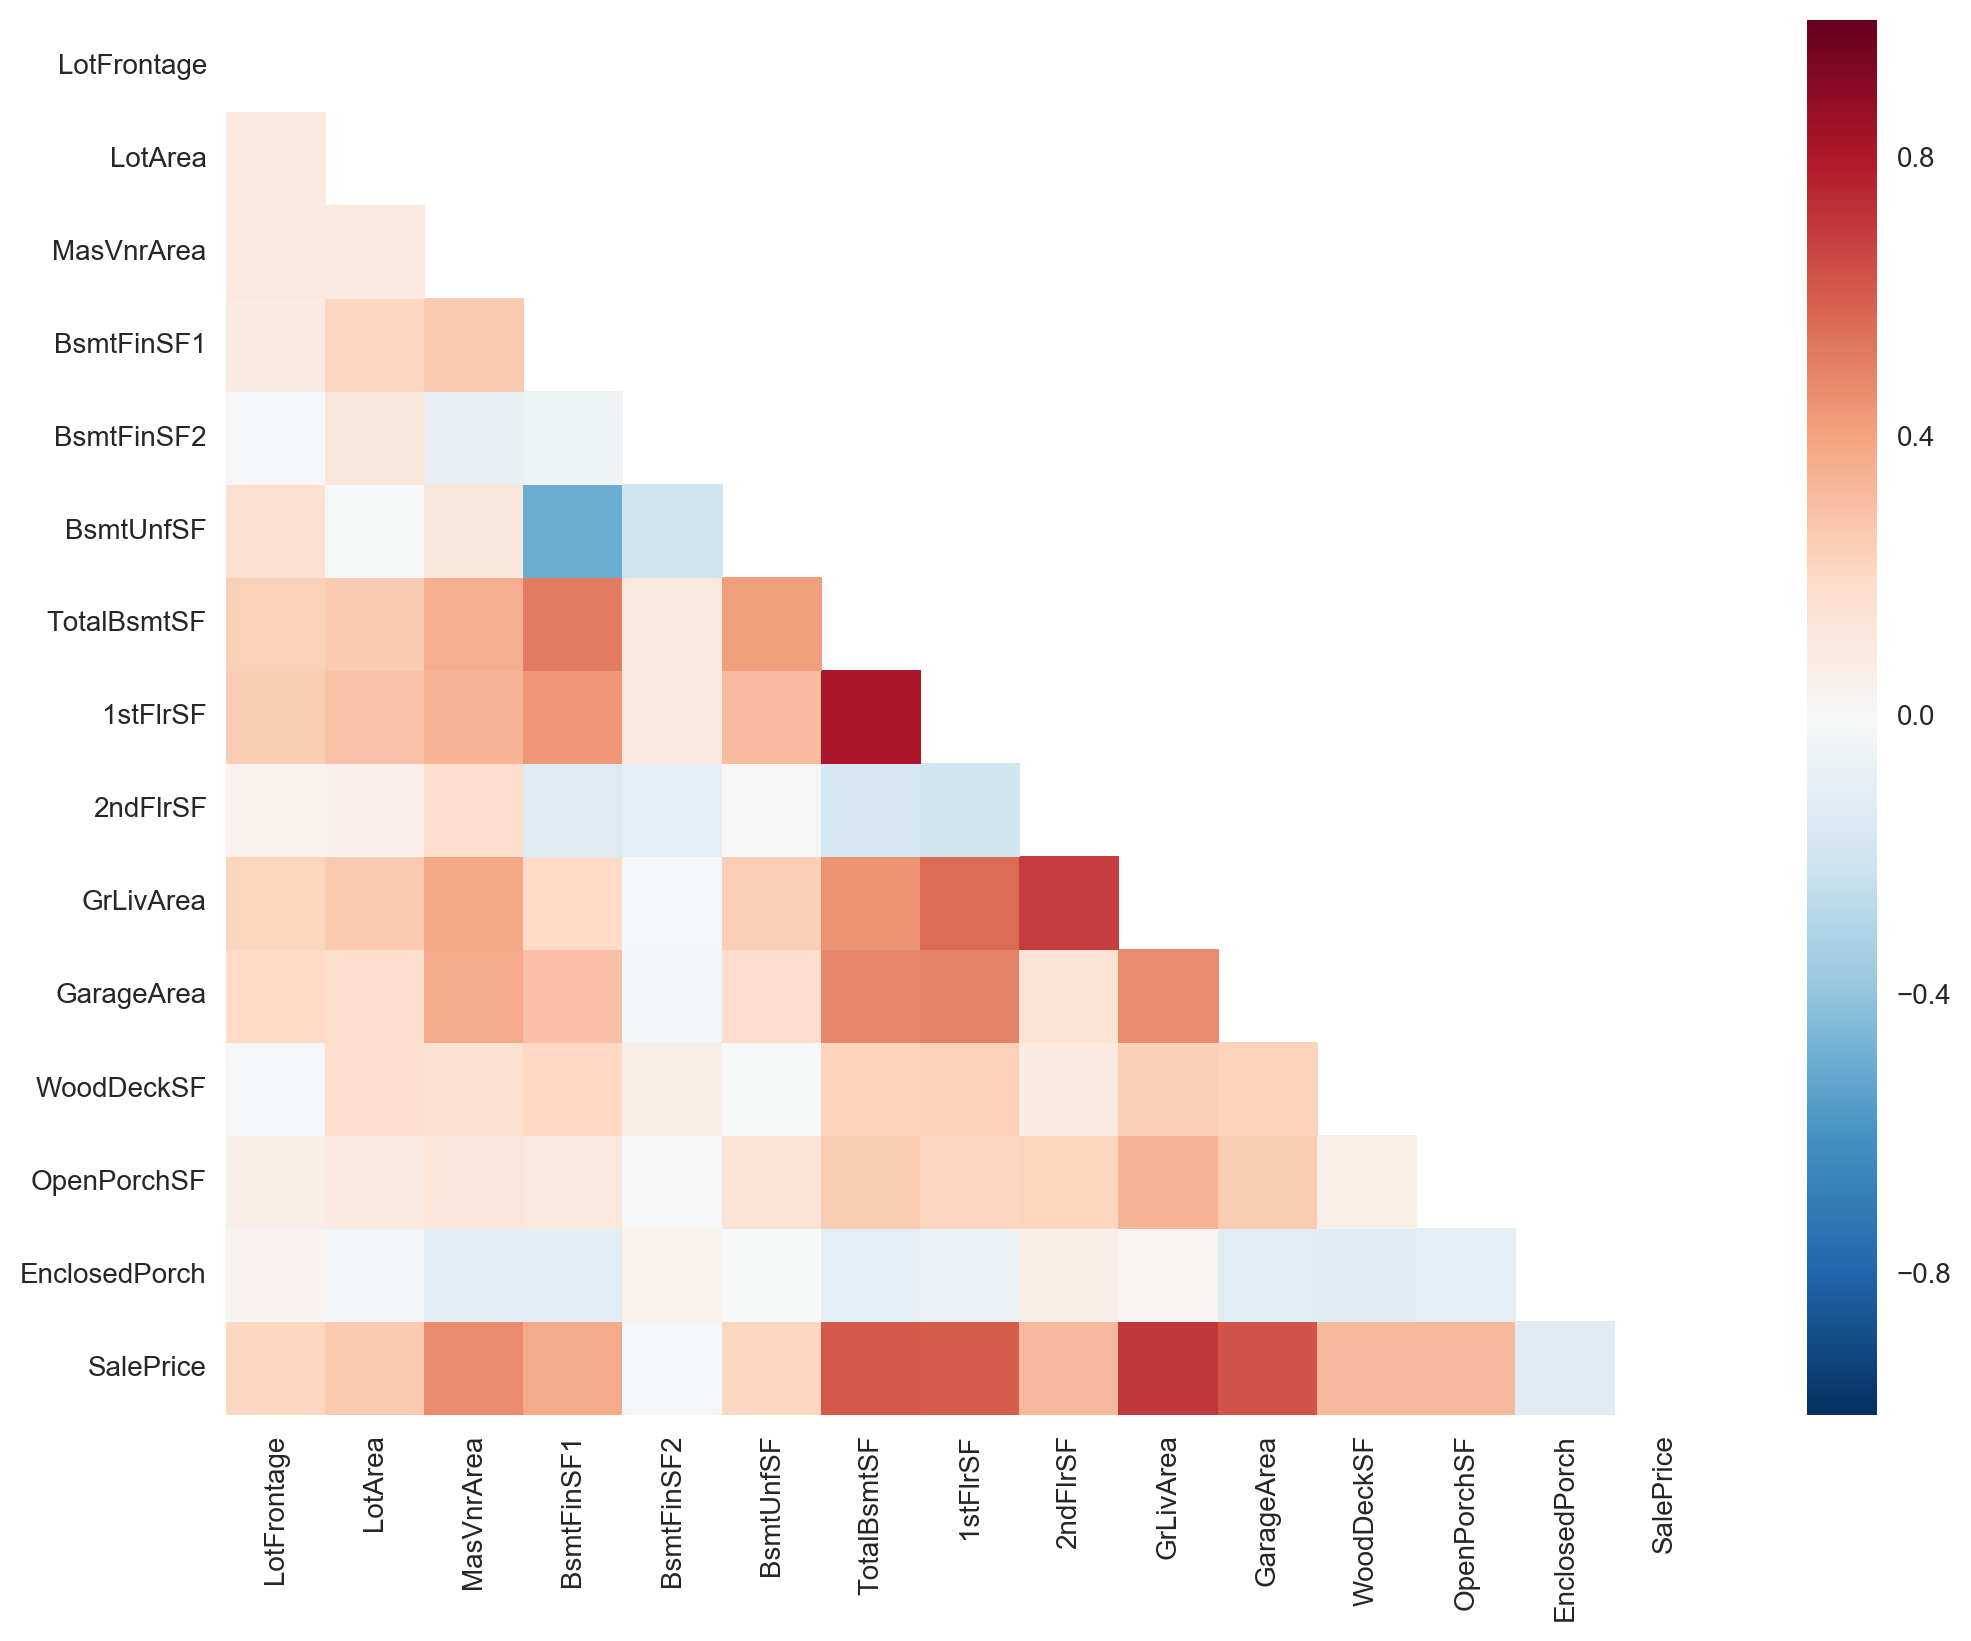

In [48]:
continuous_corr = continuous_df.corr()

plt.rcParams['figure.figsize']=(12,9)
mask = np.zeros_like(continuous_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(continuous_corr, mask=mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)
plt.show()

### Answer
- Unfinished area in basement have a strong negative correlation with Finished area Type 1.
- First floor area and Total basement area have a strong positive correlation.
- Total living area and 2nd floor living area have a strong positive correlation.
- Sale Price has a positive correlation with Total living area, Garage area, Total basement area, and first floor area. Seems like enclosed porch hurts the sale price a little, which is interesting to me.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

### Answer

- Buildin Garage has higher avg price point followed by Attached Garage.
- Not suprisingly, the more full bathrooms, the higher the price point.
- Stone Masonry veneer has highest avg price point followed by Brick Face.
- Single Family Detached and TownHouse End Unit sell the best.
- 2.5 and 2-story homes have higher price.
- New homes (Partial sales are associated with this) have the highest price point.
- The highest overall condition with score 9 has the highest avg price. But surprisingly the second highest avg price point is among middle quality homes with score 5.
- The most expensive neighborhoods are Northridge Heights and Northridge. The least expensive neighborhood is Meadow Village.

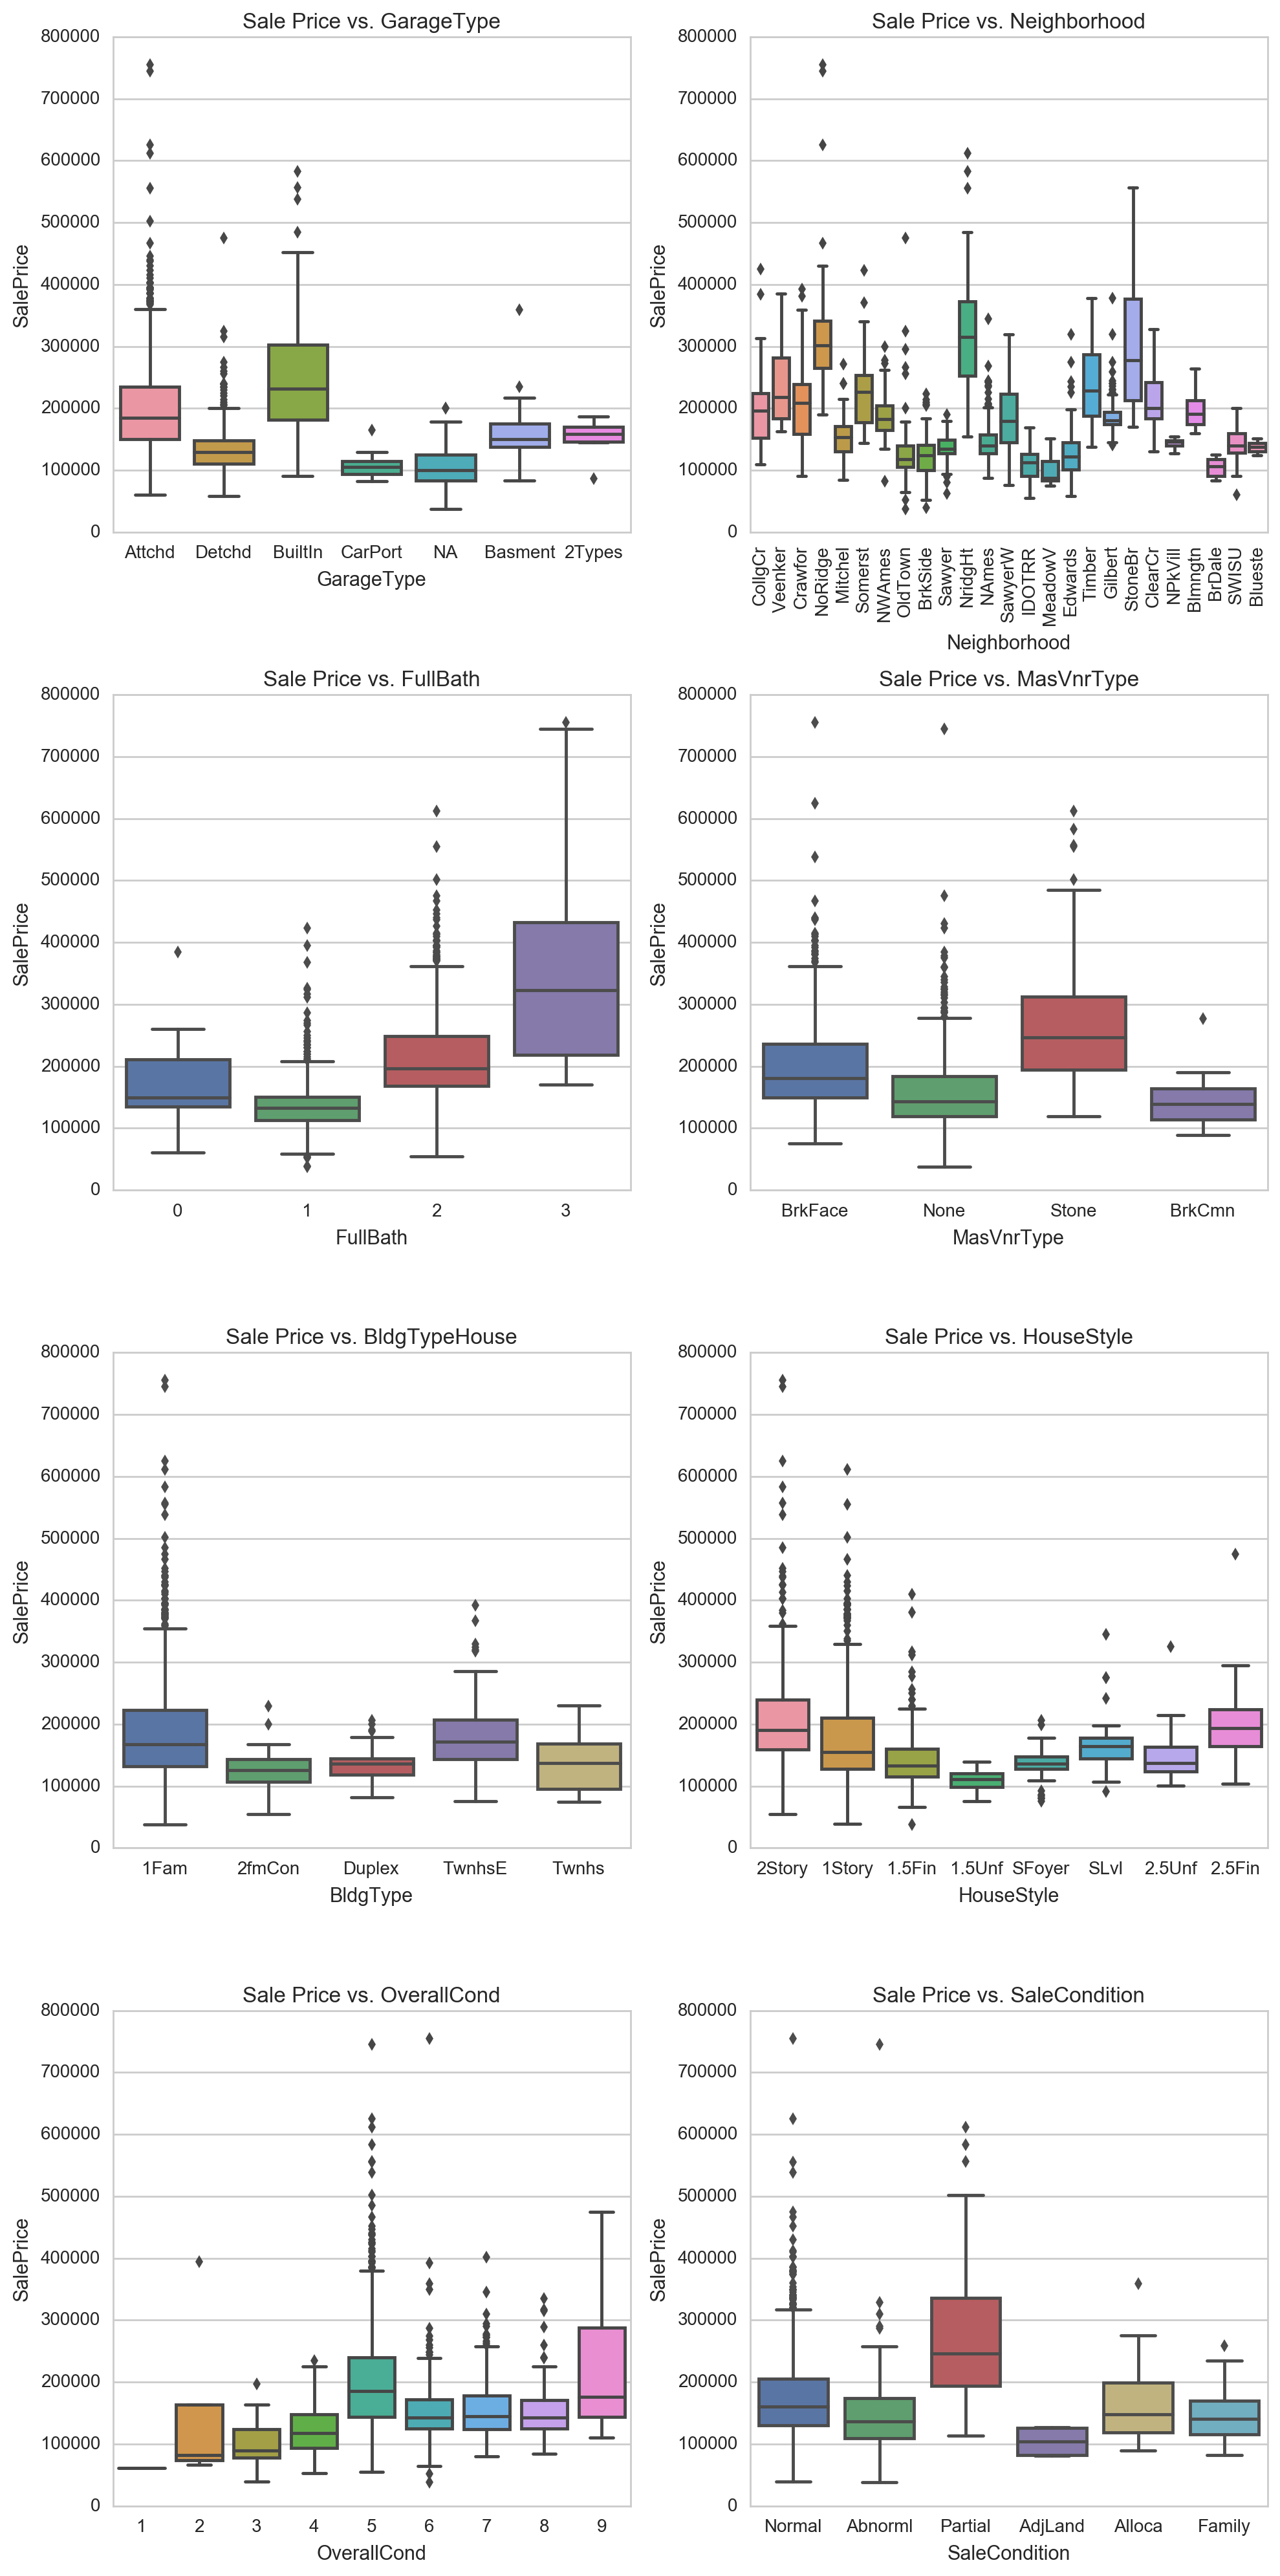

In [132]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(10, 20))
y = 'SalePrice'
data= res_house

sns.boxplot(x='GarageType', y=y, data=data, ax=ax1)
ax1.set_title('Sale Price vs. GarageType')

sns.boxplot(x='Neighborhood', y=y, data=data, ax=ax2)
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation = 90)
ax2.set_title('Sale Price vs. Neighborhood')

sns.boxplot(x='FullBath', y=y, data=data, ax=ax3)
ax3.set_title('Sale Price vs. FullBath')

sns.boxplot(x='MasVnrType', y=y, data=data, ax=ax4)
ax4.set_title('Sale Price vs. MasVnrType')

sns.boxplot(x='BldgType', y=y, data=data, ax=ax5)
ax5.set_title('Sale Price vs. BldgTypeHouse')

sns.boxplot(x='HouseStyle', y=y, data=data, ax=ax6)
ax6.set_title('Sale Price vs. HouseStyle')

sns.boxplot(x='OverallCond', y=y, data=data, ax=ax7)
ax7.set_title('Sale Price vs. OverallCond')

sns.boxplot(x='SaleCondition', y=y, data=data, ax=ax8)
ax8.set_title('Sale Price vs. SaleCondition')

plt.tight_layout()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [137]:
# Model with Statsmodels
import statsmodels.formula.api as smf

lm = smf.ols(formula='SalePrice ~ GrLivArea', data=res_house).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 05 Dec 2016   Prob (F-statistic):          1.54e-221
Time:                        08:10:38   Log-Likelihood:                -17790.
No. Observations:                1441   AIC:                         3.558e+04
Df Residuals:                    1439   BIC:                         3.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.937e+04   4480.572      4.324      0.000    1.06e+04    2.82e+04
GrLivArea    106.8228      2.792     38.261      0.000     101.346     112.299
==============================================================================
Omnibus:                      259.587   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3544.849
Skew:                           0.400   Prob(JB):                         0.00
Kurtosis:                      10.642   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

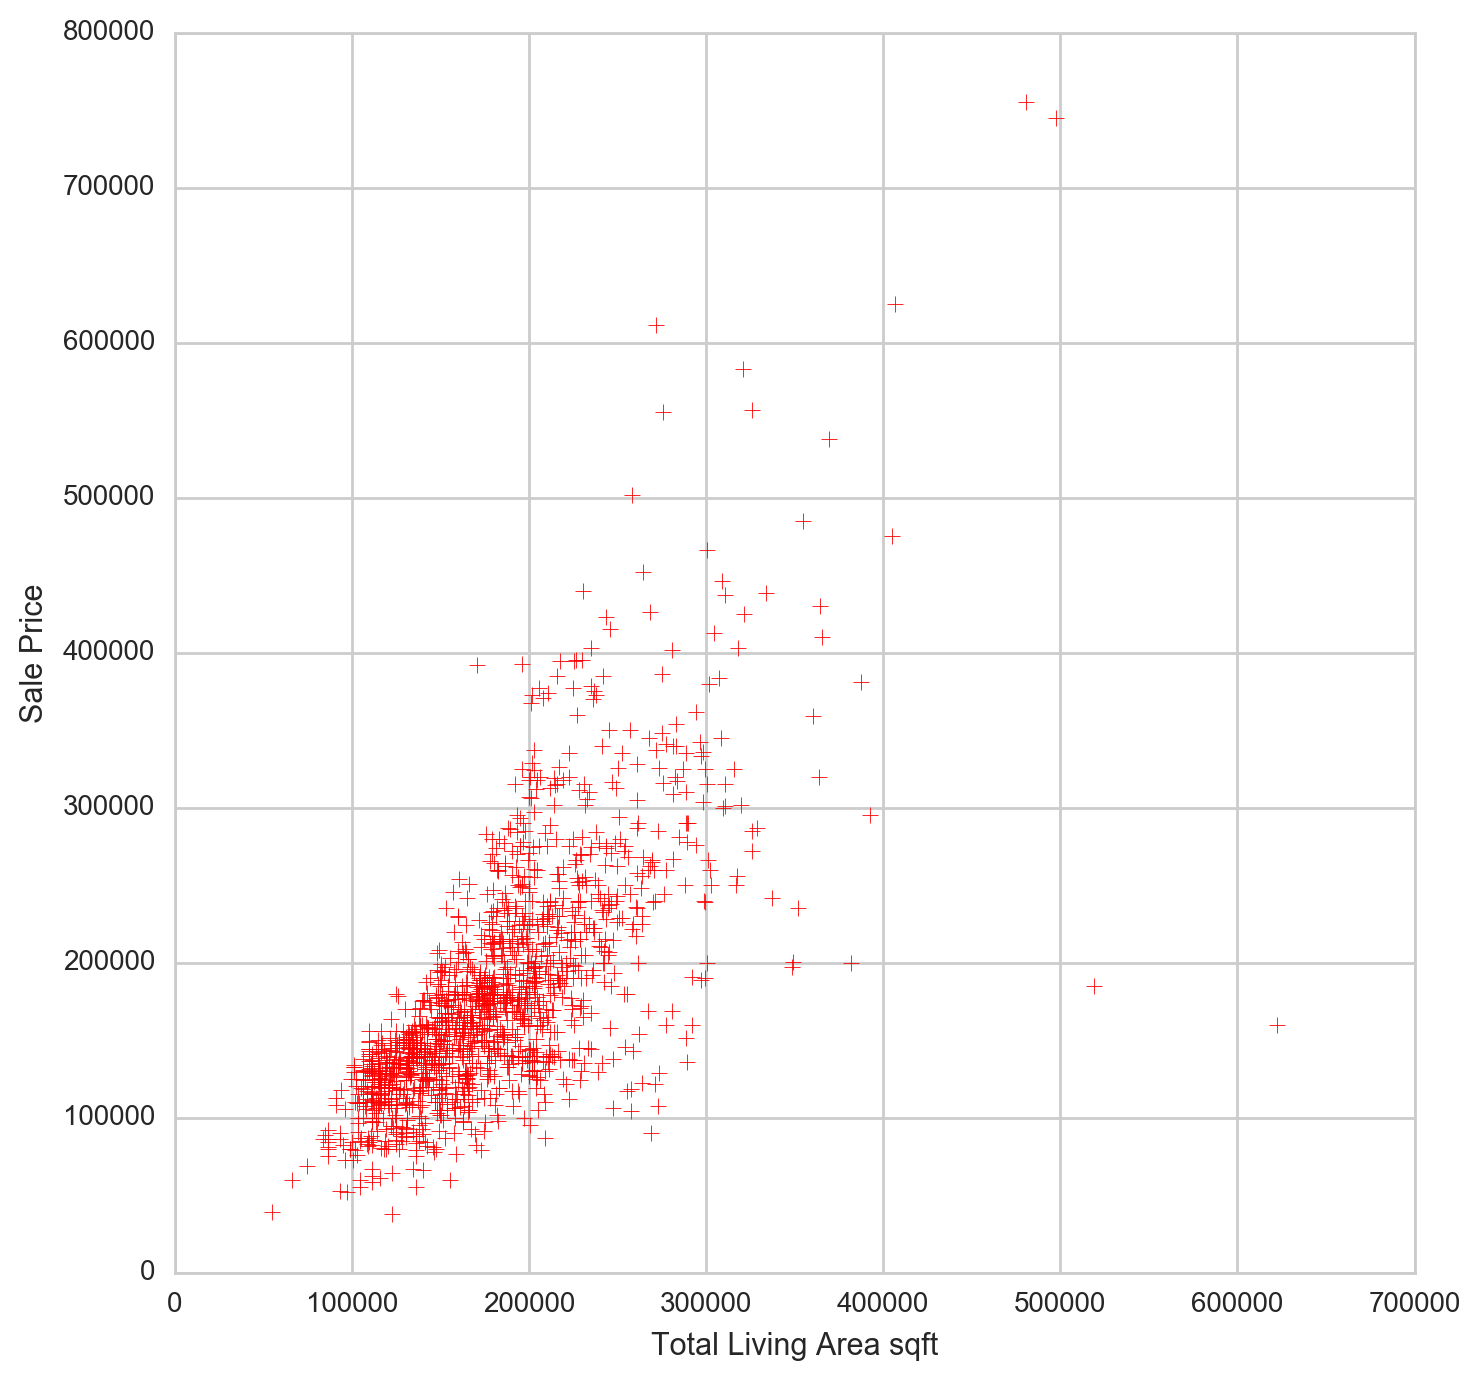

MSE:  3095168861.32
R^2:  0.504290183899
Estimated model coef:  [ 106.82277429]
Intercept:  19372.7871561


In [142]:
# Model with Scikit Learn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression() 

y = res_house['SalePrice']
X = res_house[['GrLivArea']]

model = lm.fit(X, y)
predictions = lm.predict(X)
score =  model.score(X, y)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Total Living Area sqft")
plt.ylabel("Sale Price")
plt.show()

print "MSE: ", mean_squared_error(y, predictions)
print "R^2: ", score
print "Estimated model coef: ", model.coef_
print "Intercept: ", lm.intercept_

### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

### Answer

1. The intercept coefficient - the predicted value of y when x is zero. The sale price starts at $19,373. 

2. The coefficient on GrLivArea - slope of my linear regression model. For every sqft increase in total living area, the sale price of the house increases by $106.82.

3. The R-squared value - statistical measure of how close the data are to the fitted regression line, also known as the coefficient of determination. 0 indicates that the model explains none of the variability of the response data around its mean, 1 represents a perfect fit.

4. The p-value for coefficients (P>|t|) - The p-value tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable. Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

### 8.2 Calculate the $R^2$ of your model.

### 8.3 Plot the residuals against the true values.

### 8.4 Plot a histogram of the residuals.

### 8.5 Make a plot to show the strength of the different coefficients.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

### 9.2 Fit a linear regression using all of the predictors and score it.

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

### 10.2 What does the cross-validated average $R^2$ tell you?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**